## Data Analysis On Walmart

- ANALYSIS 

## Installing Packages and Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV


In [28]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import json
# import requests
# import hvplot.pandas
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import plotly.express as px
# import plotly.graph_objects as go
# import mplcursors
# from sklearn.preprocessing import StandardScaler



## Step 1: Download the dataset

In [3]:
# Extrating Raw Data for Walmart
csv_file_path = '../Final_project/Resources/Walmart.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Feature engineering - extract year, month, and day from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
#df['WeekofYear'] = df['Date'].dt.weekofyear

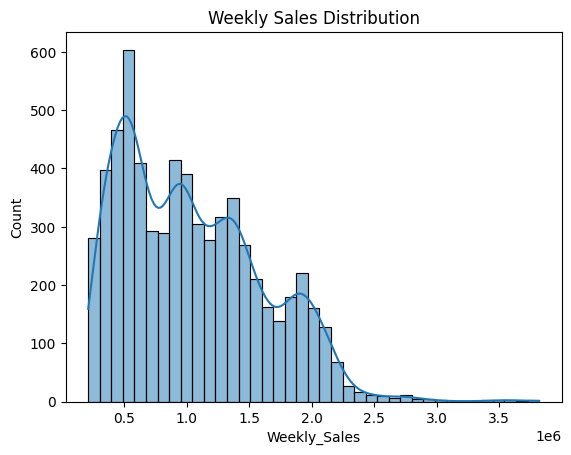

In [7]:
# Plot weekly sales distribution
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Weekly Sales Distribution')
plt.show()

In [8]:
# Feature selection
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']

# Split data into features and target
X = df[features]
y = df['Weekly_Sales']

In [9]:
# Split data into training and testing sets for the transformed target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Build a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'R2 Score (Random Forest): {r2_rf}')
print(f'RMSE (Random Forest): {rmse_rf}')

R2 Score (Random Forest): 0.958079819067563
RMSE (Random Forest): 116210.05824650699


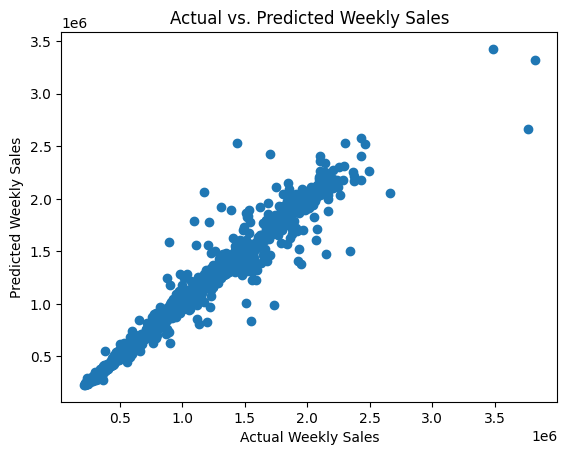

In [12]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.show()

# Data Pre-processing

In [13]:
data_copy = df.copy()

In [14]:
data_copy.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Day                      int32
dtype: object

In [15]:
def get_season(quarter):

    '''this function is to get season according to quarter column'''

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [16]:
# correct data format of the 'date' column
data_copy['date'] = pd.to_datetime(data_copy['Date'], format = "%d-%m-%Y")

# Create a new column "year" containing the year
data_copy['year'] = data_copy['Date'].dt.year

# Create a new column "quarter" containing the season number
data_copy['quarter'] = data_copy['Date'].dt.quarter

# Create a new column "season" containing the season
data_copy['season'] = data_copy['quarter'].apply(get_season)

# Create a new column "month" containing the month number
data_copy['month'] = data_copy['Date'].dt.month

# Create a new column "month_name" containing the month names
data_copy['month_name'] = data_copy['Date'].dt.month_name()

# Create a new column "week" containing the week number
data_copy['week'] = data_copy['Date'].dt.isocalendar().week

# Create a new column "day_of_week" containing the day names
data_copy['day_of_week'] = data_copy['Date'].dt.day_name()

In [17]:
# display a data sample
data_copy.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,date,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-02-05,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-02-12,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02-19,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02-26,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-03-05,2010,1,Winter,3,March,9,Friday


In [19]:
# Check the data types 
data_copy.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Day                      int32
date            datetime64[ns]
year                     int32
quarter                  int32
season                  object
month                    int32
month_name              object
week                    UInt32
day_of_week             object
dtype: object

In [19]:
# Drop the unwanted columns from dataframe
data_copy.drop(['date','year', 'quarter', 'month','Day', 'day_of_week'], axis = 1, inplace = True)

In [20]:
# dataFrame after dropping the colummns
data_copy.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
season                  object
month_name              object
week                    UInt32
dtype: object

In [20]:
#  Convert store and holiday and week columns as categorical features,
# so we should convert them into categories (objects)
data_copy['Store'] = data_copy['Store'].astype('object')
data_copy['Holiday_Flag'] = data_copy['Holiday_Flag'].astype('object')
data_copy['week'] = data_copy['week'].astype('object')

In [43]:
# Check the data types after convert
data_copy.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag            object
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Day                      int32
date            datetime64[ns]
year                     int32
quarter                  int32
season                  object
month                    int32
month_name              object
week                    object
day_of_week             object
dtype: object

0 Fuel_Price
1 Temperature
2 CPI
3 Unemployment


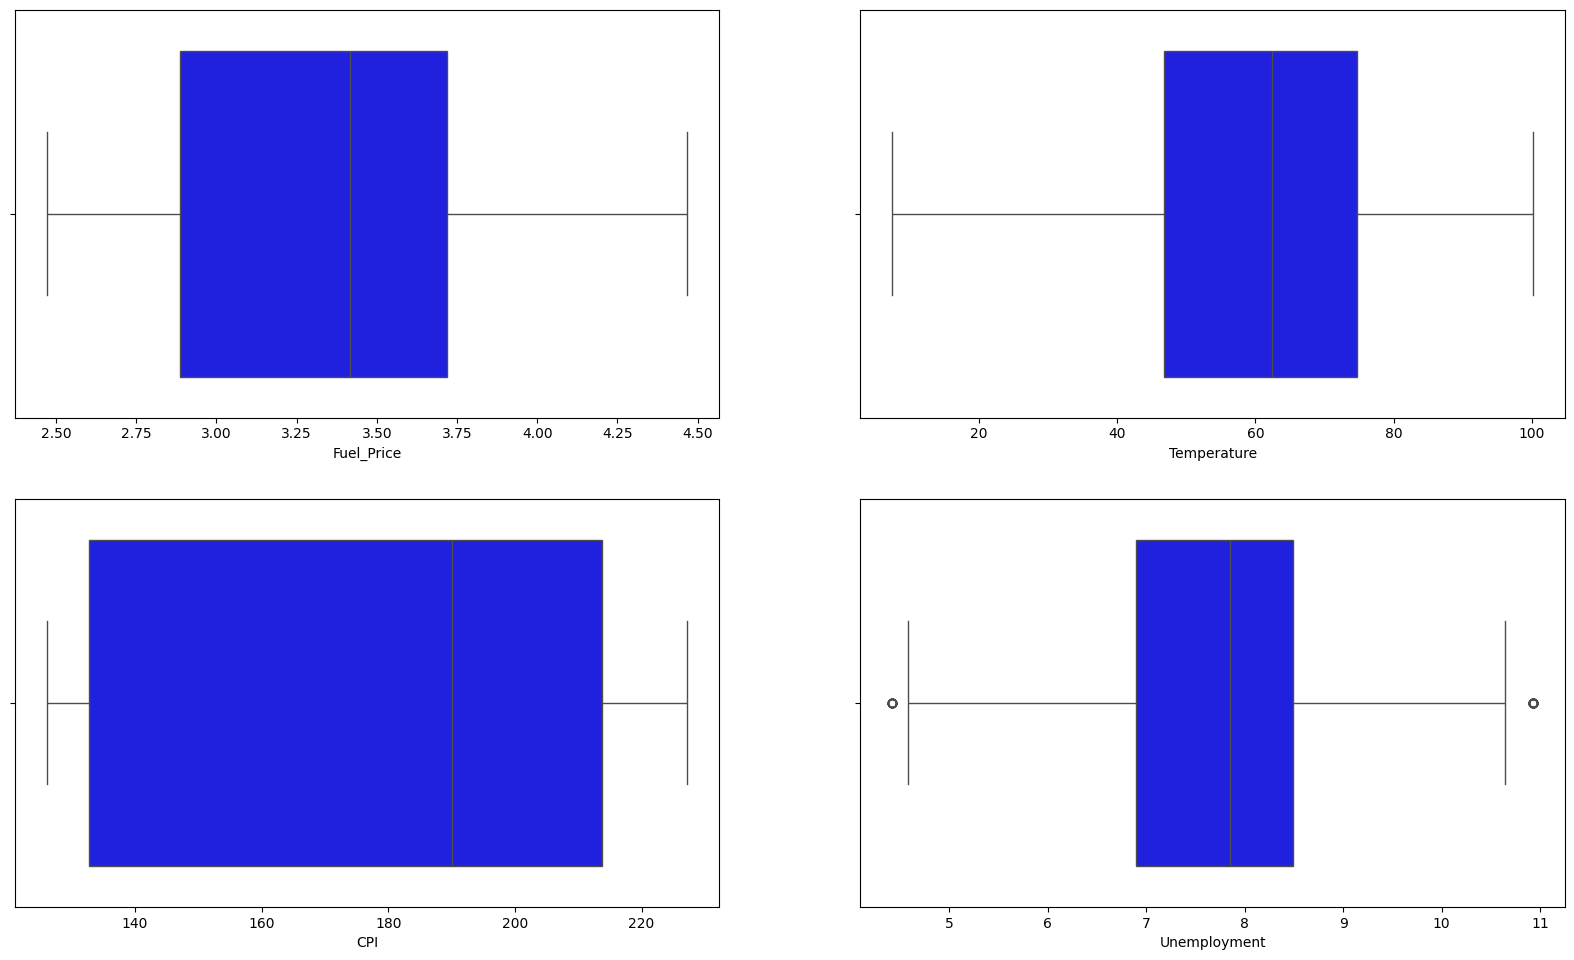

Number of data rows:  5938


In [44]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_copy, x = col, color = 'Blue')
plt.show()

print('Number of data rows: ', data_copy.shape[0])

In [45]:
# Remove outliers from the temperature column
data_copy.drop(data_copy[data_copy['Temperature'] < 7].index, axis = 0, inplace = True)

# Remove outliers from the unemployment column
data_copy.drop(data_copy[data_copy['Unemployment'] < 4.4].index, axis = 0, inplace = True)
data_copy.drop(data_copy[data_copy['Unemployment'] > 11].index, axis = 0, inplace = True)

In [46]:
# Number of Rows after removing outliers
print('Number of data rows: ', data_copy.shape[0])

Number of data rows:  5938


### Splitting The Data To Training And Testing Data

In [25]:
# Splitting data for train and test
X = data_copy.drop('Weekly_Sales', axis = 1)
y = data_copy['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
# For explaining the byfercation of data for training and testing
rint('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5938, 18)
Shape of train data:  (4750, 18)
Shape of test data :  (1188, 18)


In [27]:
# Splitting the data into Numerical Features and Categorical Features
num_features = data_copy.select_dtypes('number').columns.to_list()
num_features.remove('Weekly_Sales')

cat_features = data_copy.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'year', 'quarter', 'month']
Categorical Features: ['Store', 'Holiday_Flag', 'season', 'month_name', 'week', 'day_of_week']


In [28]:
# data transformation pipeline
preprocessor = ColumnTransformer([
                                  ('num_features', StandardScaler(), num_features),
                                  ('cat_features', BinaryEncoder(), cat_features),
                                ])

# Fitting the training data
preprocessor.fit(X_train)

c:\Users\Shah_\anaconda3\envs\dev1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Shah_\anaconda3\envs\dev1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Shah_\anaconda3\envs\dev1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment', 'Year', 'Month', 'Day',
                                  'year', 'quarter', 'month']),
                                ('cat_features', BinaryEncoder(),
                                 ['Store', 'Holiday_Flag', 'season',
                                  'month_name', 'week', 'day_of_week'])])

In [29]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

c:\Users\Shah_\anaconda3\envs\dev1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Shah_\anaconda3\envs\dev1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Shah_\anaconda3\envs\dev1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill

In [30]:
# Linear Regression Model
LR = LinearRegression()

# Fitting the data
LR.fit(X_train_transformed, y_train)

LinearRegression()

In [47]:
# Function to distribute 
def Distribution_Plot(estimator, Training_Testing, X, y, Title):

    """This function is used to perform some model evaluation using training and testing data \
    by plotting the distribution of the actual and predicted values of the training or testing data."""

    # Y predict of X train or X test
    yhat = estimator.predict(X)

    plt.figure(figsize=(14, 6))
    ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = "r", label = f'Predicted Values ({Training_Testing})', ax = ax1)
    plt.title(Title, size = 18)
    plt.legend()
    plt.show()

C:\Users\Shah_\AppData\Local\Temp\ipykernel_24520\2545071257.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\Shah_\AppData\Local\Temp\ipykernel_24520\2545071257.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

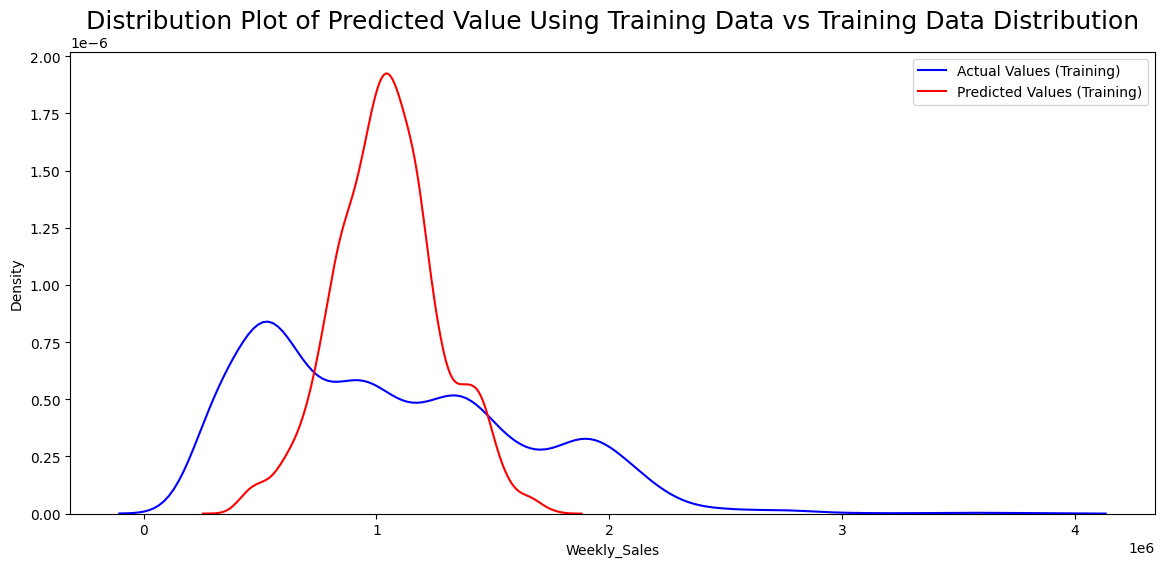

In [48]:
# Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'

Distribution_Plot(LR, 'Training', X_train_transformed, y_train, Title)

In [49]:
# To evaluate the model
def model_evaluation(estimator, Training_Testing, X, y):

    ''' This function is used to evaluate the model through RMSE and R2'''

    # Y predict of X train or X test
    predict_data = estimator.predict(X)

    print(f'{Training_Testing} Accuracy: \n')
    print(f'-> Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y, predict_data)), 2)}')
    print(f'-> R-Squere score Training: {round(r2_score(y, predict_data) * 100, 2)} % \n')

In [50]:
# Training Accuracy
model_evaluation(LR, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 520720.19
-> R-Squere score Training: 16.54 % 



In [35]:
# Parameter tuning
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'rarm2', n = 5):

    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''


    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

In [51]:
# Polynomial Regression Model
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                    ('lin_reg', LinearRegression())])

# Define the parameter grid to search
param_grid = {'poly_feat__degree': [2, 3, 4]}

best_estimator = hyperparameter_tunning(LR_pipe, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

In [37]:
# Linear Regression Model after tuning
poly_reg = best_estimator

In [47]:
# Training Accuracy Afer tuning
model_evaluation(poly_reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 59678.31
-> R-Squere score Training: 98.9 % 



C:\Users\Shah_\AppData\Local\Temp\ipykernel_24520\2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
C:\Users\Shah_\AppData\Local\Temp\ipykernel_24520\2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

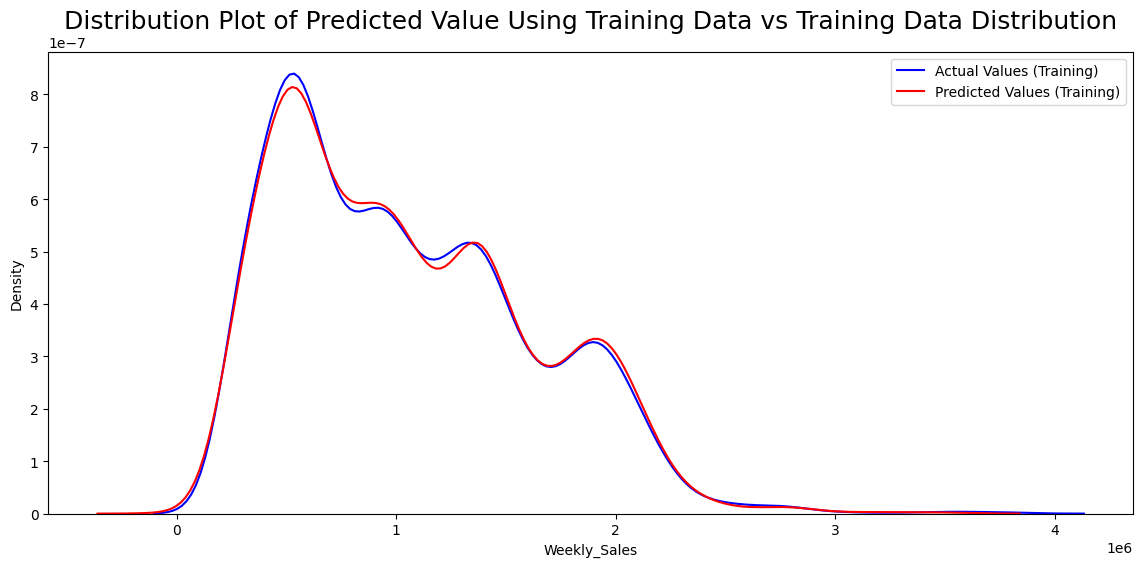

In [38]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(poly_reg, 'Training', X_train_transformed, y_train, Title)

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
month = df['Month'] = df['Date'].dt.month

In [5]:
year = df['Year'] = df['Date'].dt.year

In [6]:
df['Month'] = month
df['Year'] = year
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9


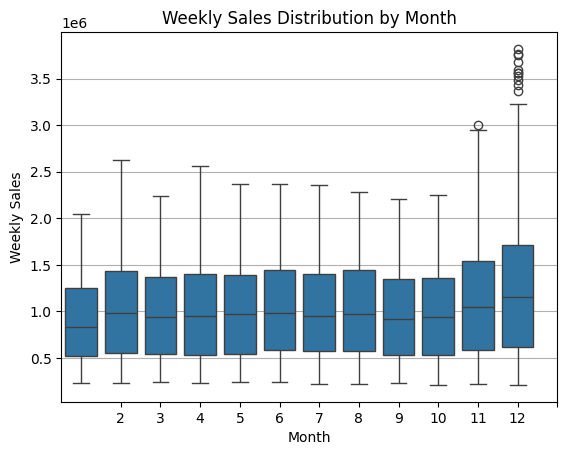

In [7]:
import seaborn as sns
# Plot box plot
sns.boxplot(x='Month', y='Weekly_Sales', data=df)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Month')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

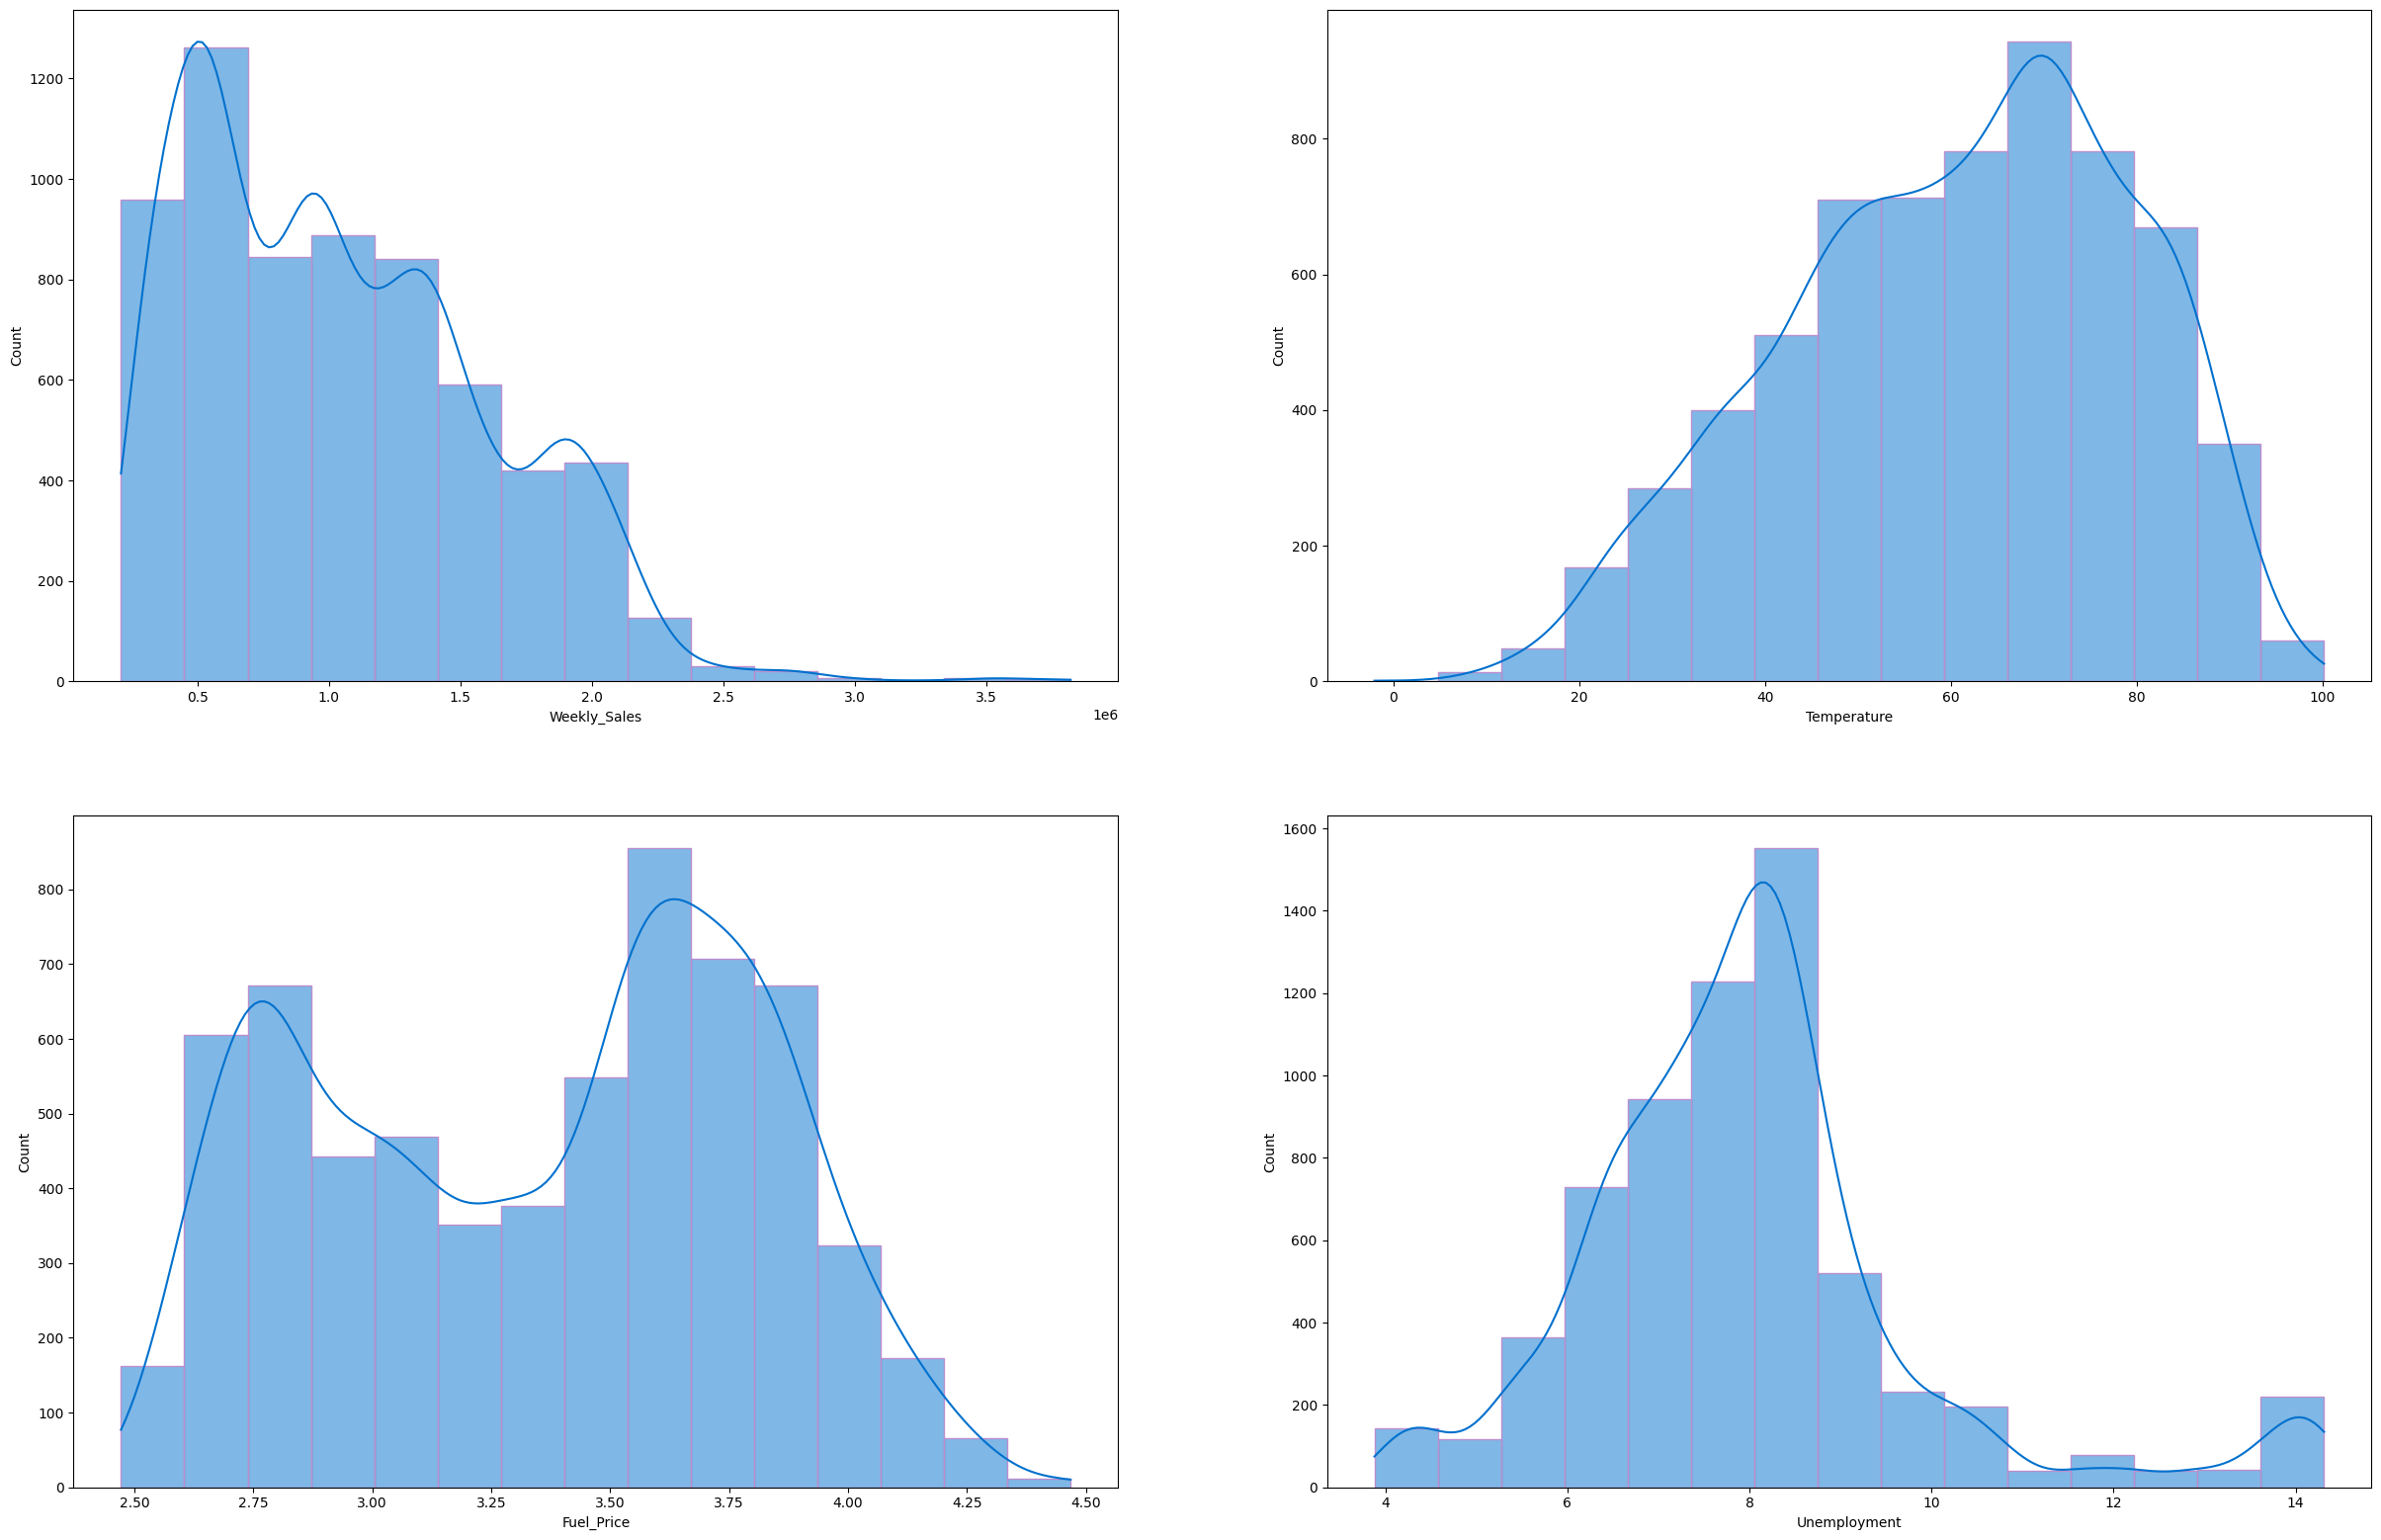

In [8]:
# Create a Histogram to show the distribution of the data for 
# Weekly Sales, "Temperature", "Fuel Price", and "Unemployment"

columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
plt.figure(figsize=(30,30))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color='#0071CE', edgecolor='#BB8FCE')

In [9]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
figure = px.scatter(
    data_frame=df,
    x="Year",
    y="Month",
    color="Month",
    size="Month",  # Specify the column you want to use for size
    trendline="ols"
)
figure.show()

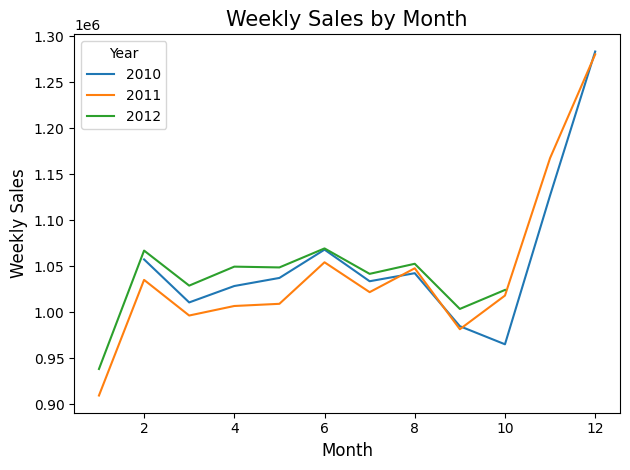

In [10]:
#What are the highest performing months? (Weekly sales by month)

monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")

monthly_sales.plot()

plt.xlabel('Month', fontname="sans-serif", fontsize=12)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=12)
plt.title('Weekly Sales by Month', fontname="sans-serif", fontsize=15)

# plt.xticks(rotation=45, fontname="sans-serif", fontsize=30)
plt.tight_layout()
plt.show()

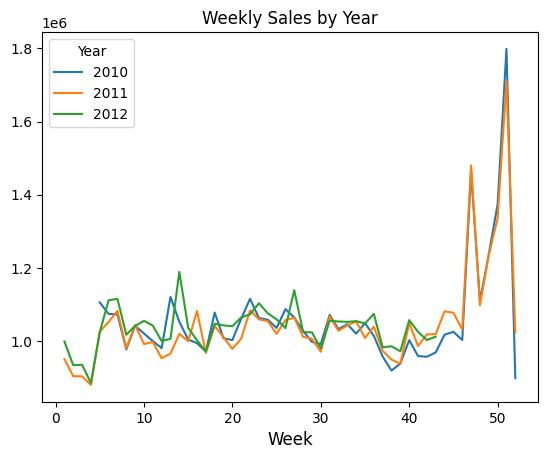

In [11]:
#What are the highest performing weeks? (sales by weeks)
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")

weekly_sales.plot()
plt.xlabel('Week', fontname="sans-serif", fontsize=12)
# plt.ylabel('Sales', fontname="sans-serif", fontsize=12)
plt.title('Weekly Sales by Year', fontname="sans-serif", fontsize=12)
plt.show()
#weekly_sales.plot()

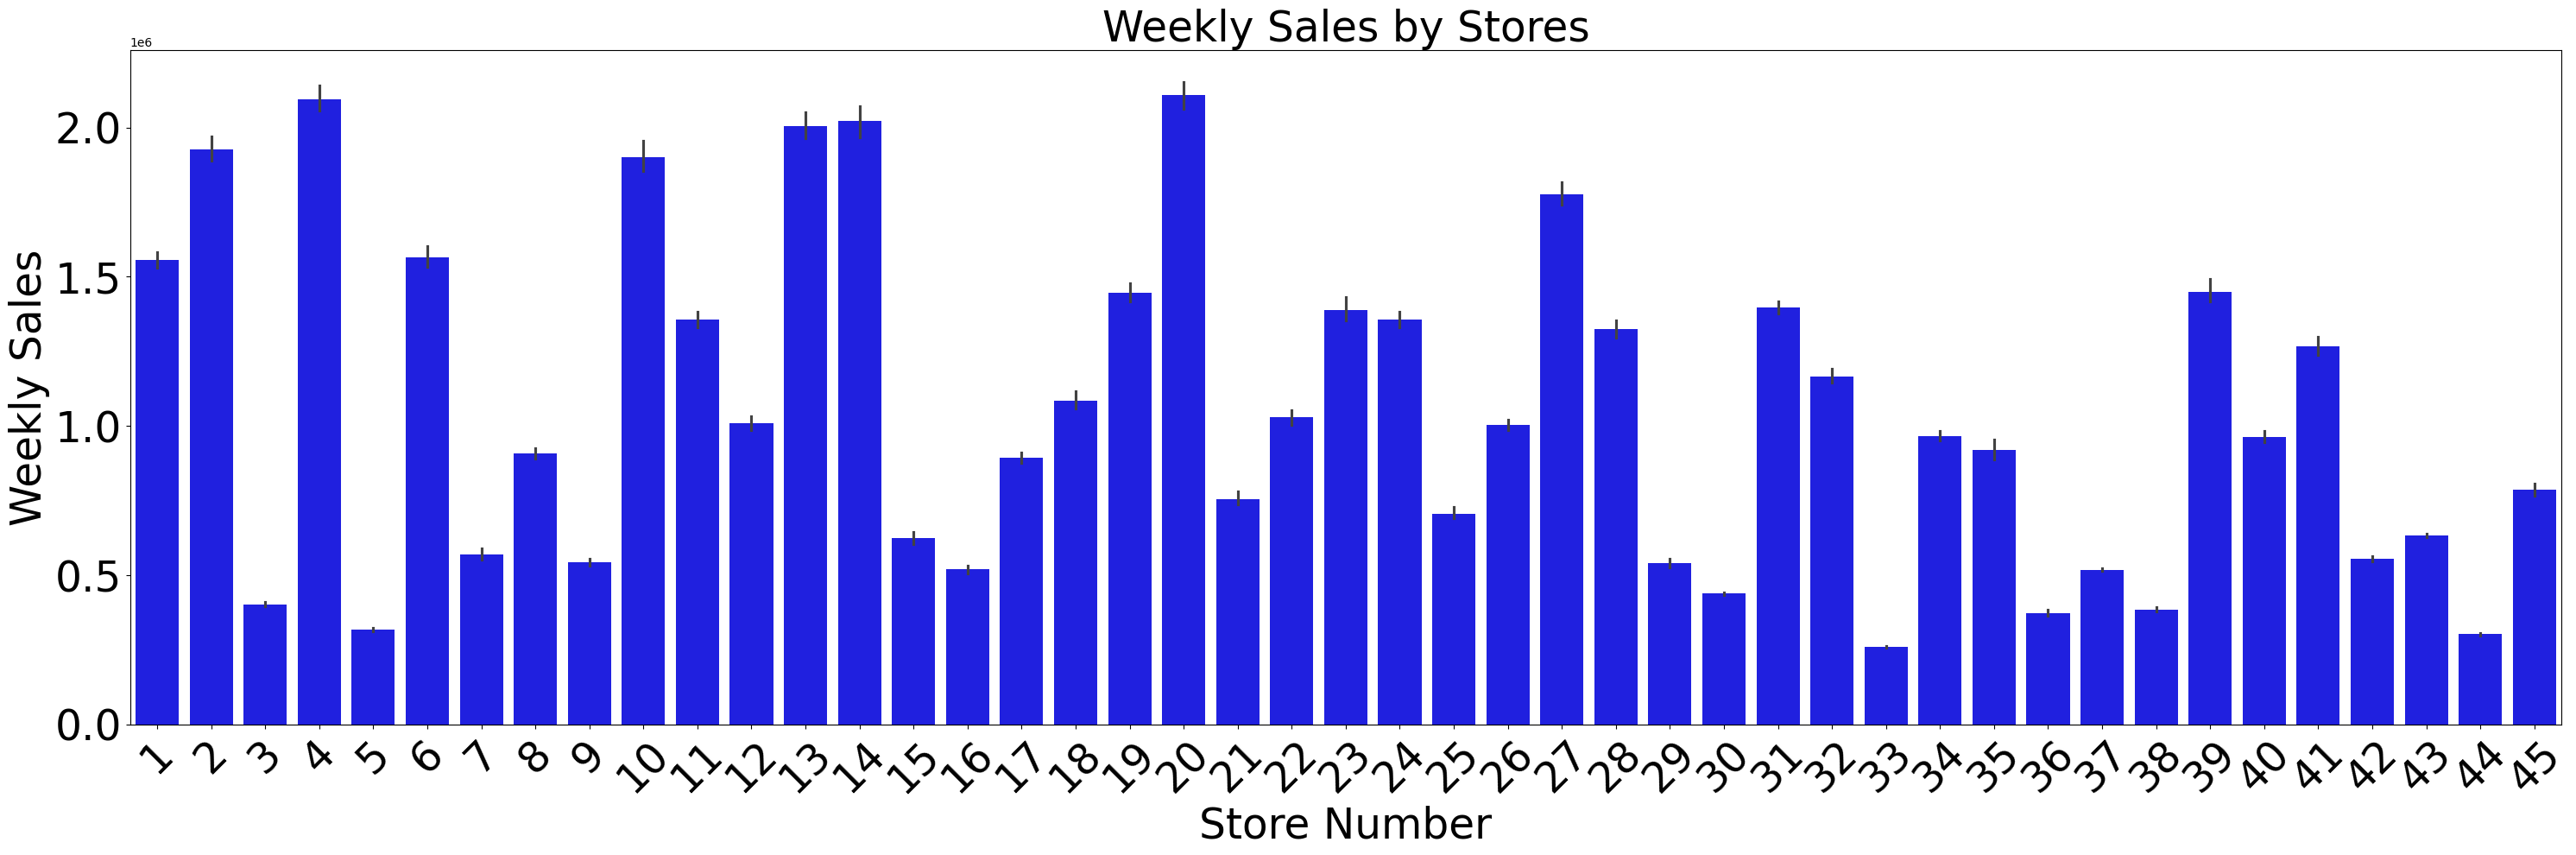

In [41]:
# Assuming df is your DataFrame containing the data
plt.figure(figsize=(30, 10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#0000FF', data=df)

plt.xlabel('Store Number', fontname="sans-serif", fontsize=35)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=35)
plt.title('Weekly Sales by Stores', fontname="sans-serif", fontsize=35)

plt.xticks(rotation=45, fontname="sans-serif", fontsize=35)
plt.yticks(fontname="sans-serif", fontsize=35)
plt.tight_layout()
plt.show()

In [42]:
figure = px.scatter(
    data_frame=df,
    x="Year",
    y="Weekly_Sales",
    color="Store",
    trendline="ols"
)
figure.show()

NameError: name 'px' is not defined

In [14]:
import pandas as pd
import plotly.graph_objects as go

weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Create an interactive time series plot of weekly sales using Plotly
fig = go.Figure()

# Add a trace for weekly sales
fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales.values, mode='lines+markers', name='Weekly Sales'))

# Update layout
fig.update_layout(
    title='Time Series Plot of Weekly Sales',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    hovermode='x',
    showlegend=True
)

fig.show()

In [15]:
# Plot scatter plot of Weekly Sales vs. Temperature

fig = px.scatter(df, x='Temperature', y='Weekly_Sales', title='Weekly Sales vs. Temperature', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Temperature', yaxis_title='Weekly Sales')

In [16]:
# Plot scatter plot of Weekly Sales vs. Fuel Price

fig = px.scatter(df, x='Fuel_Price', y='Weekly_Sales', title='Weekly Sales vs. Fuel Price', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Fuel Price', yaxis_title='Weekly Sales')

fig.show()

In [17]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Create an interactive line plot of Weekly Sales vs. Month using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_sales.index,
                         y=monthly_sales.values,
                         mode='lines+markers',
                         name='Weekly Sales'))

fig.update_layout(title='Weekly Sales vs. Month',
                  xaxis_title='Month',
                  yaxis_title='Average Weekly Sales',
                  xaxis=dict(tickmode='array',
                             tickvals=list(range(1, 13)),
                             ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))

In [18]:
# Plot scatter plot of Weekly Sales vs. Store

fig = px.scatter(df, x='Store', y='Weekly_Sales', title='Weekly Sales vs. Store', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Store', yaxis_title='Weekly Sales')

In [19]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


In [21]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int32
Year                     int32
Week                    UInt32
dtype: object

In [30]:
# Assuming df contains your DataFrame with columns 'Month', 'Year', 'Week', and 'Sales'
X = df[['Month', 'Year', 'Week']]  # Input features
y = df['Weekly_Sales']  # Target variable

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# # Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X,y)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# The code calculates the total number of input features in the training data (X_train),  which represents a single data point.
input_features_total = len(X_train)
input_features_total

5148

In [38]:
# Attempt 1.
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train ) # total number of features

hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

NameError: name 'tf' is not defined